In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [33]:
housing_raw = pd.read_csv(
    'Data Viz with Matplotlib & Seaborn/Data/housing_data.csv',
    parse_dates=['period_begin','period_end'],
    dtype={
        'total_homes_sold':'Int32',
        'region_name':'category'
    })

In [34]:
# loc: seleciona só o que contem CA
# assign: remove o estado + 'county' da str
ca_housing = housing_raw.loc[
    (housing_raw['region_name'].str.contains('CA'))
].assign(region_name = housing_raw['region_name'].str[0:-11])

In [35]:
housing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622339 entries, 0 to 622338
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   region_name               622339 non-null  category      
 1   period_begin              622339 non-null  datetime64[ns]
 2   period_end                622339 non-null  datetime64[ns]
 3   total_homes_sold          567839 non-null  Int32         
 4   inventory                 616247 non-null  float64       
 5   active_listings           616905 non-null  float64       
 6   age_of_inventory          616247 non-null  float64       
 7   median_active_list_price  616513 non-null  float64       
 8   months_of_supply          561319 non-null  float64       
dtypes: Int32(1), category(1), datetime64[ns](2), float64(5)
memory usage: 37.5 MB


In [36]:
ca_housing_pivot = ca_housing.pivot_table(
    index='region_name',
    #columns='median_active_list_price',
    values='median_active_list_price'
).loc[['Los Angeles','San Diego','San Francisco']]

In [37]:
prices = (
    ca_housing
    .groupby("region_name")
    .agg({
        "median_active_list_price":"mean"
    })
)

In [38]:
prices_target = prices.loc[['Los Angeles','San Diego','San Francisco']].sort_values(by='median_active_list_price')

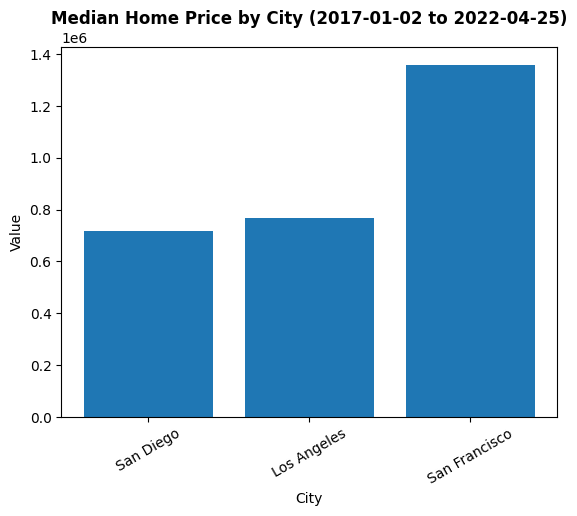

In [39]:
fig, ax = plt.subplots()

ax.bar(prices_target.index, prices_target['median_active_list_price'])

ax.set_title(
    'Median Home Price by City (2017-01-02 to 2022-04-25)',
    weight='bold'
    )
ax.set_xlabel('City')
ax.set_ylabel('Value')
ax.xaxis.set_tick_params(rotation=30)

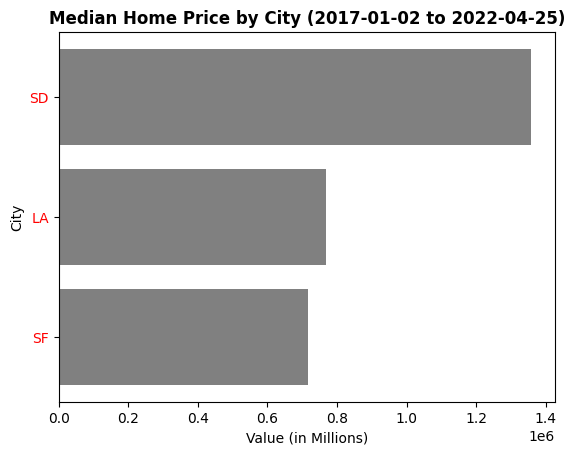

In [40]:
fig, ax = plt.subplots()

ax.barh(
    ['SF','LA','SD'], 
    prices_target['median_active_list_price'],
    color=['gray','gray','gray']
    )

ax.set_title(
    'Median Home Price by City (2017-01-02 to 2022-04-25)',
    weight='bold'
    )

ax.set_ylabel('City')
ax.set_xlabel('Value (in Millions)')

ax.yaxis.set_tick_params(labelcolor='red')

In [41]:
ca_or = housing_raw.loc[(housing_raw['region_name'].str[-2:].isin(['CA','OR','WA']))]
ca_or.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,"Sacramento County, CA",2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
19,"Garfield County, WA",2019-06-17,2019-09-08,7,9.0,10.0,52.7,152666.6,9.333333
26,"Gilliam County, OR",2018-06-18,2018-09-09,3,9.0,9.0,95.6,143037.5,9.000000
99,"Klickitat County, WA",2017-04-17,2017-07-09,48,53.0,58.0,87.2,326237.5,16.193434
124,"Jefferson County, WA",2017-02-06,2017-04-30,138,177.0,190.0,127.8,404637.5,22.486617


In [ ]:
# DataFrame.loc[linhas, colunas]
ca_or = ca_or.assign(
    price_range = pd.cut(
        ca_or.loc[:,'median_active_list_price'],
        [0,400_000,600_000,2_000_000],
        labels=['0-400k','400k-600k','600k+']
    ),
    state = ca_or['region_name'].str[-2:]
)

In [ ]:
ca_or = ca_or.query("period_end == '2021-08-01'").pivot_table(
    index='price_range',
    columns='state',
    values='inventory', # irá trabalhar com os valores desta coluna
    aggfunc='sum', # somará
)
ca_or

C:\Users\f0fp0228\AppData\Local\Temp\ipykernel_18304\2128133443.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  ca_or = ca_or.query("period_end == '2021-08-01'").pivot_table(
C:\Users\f0fp0228\AppData\Local\Temp\ipykernel_18304\2128133443.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ca_or = ca_or.query("period_end == '2021-08-01'").pivot_table(


state,CA,OR,WA
price_range,,,
0-400k,4267.0,1074.0,2143.0
400k-600k,13877.0,4711.0,4858.0
600k+,35147.0,1229.0,3649.0


Text(0.5, 0, 'Value')

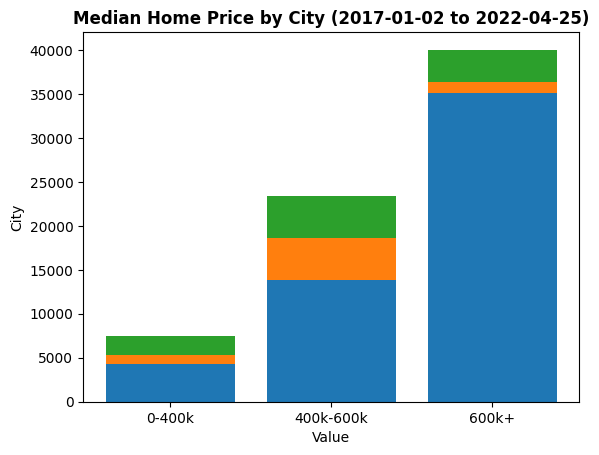

In [ ]:
# um valor sobre o outro:

fig, ax = plt.subplots()

ax.bar(
    ca_or.index, 
    ca_or['CA'],
    label='California'
    )

ax.bar(
    ca_or.index, 
    ca_or['OR'],
    label='Oregon',
    bottom=ca_or['CA']
    )

ax.bar(
    ca_or.index, 
    ca_or['WA'],
    label='Washington',
    bottom=ca_or['CA']+ca_or['OR']
    )

ax.set_title(
    'Median Home Price by City (2017-01-02 to 2022-04-25)',
    weight='bold'
    )

ax.set_ylabel('City')
ax.set_xlabel('Value')

In [52]:
ca_or

state,CA,OR,WA
price_range,,,
0-400k,4267.0,1074.0,2143.0
400k-600k,13877.0,4711.0,4858.0
600k+,35147.0,1229.0,3649.0


Text(0.5, 0, 'Value')

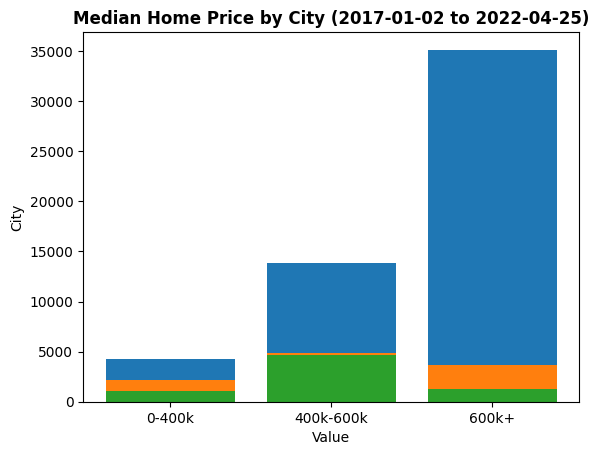

In [ ]:
# os valores maiores ao fundo:

fig, ax = plt.subplots()

ax.bar(
    ca_or.index, 
    ca_or['CA'],
    label='California'
    )

ax.bar(
    ca_or.index, 
    ca_or['WA'],
    label='Washington',
    )

ax.bar(
    ca_or.index, 
    ca_or['OR'],
    label='Oregon',
    )

ax.set_title(
    'Median Home Price by City (2017-01-02 to 2022-04-25)',
    weight='bold'
    )

ax.set_ylabel('City')
ax.set_xlabel('Value')

<Axes: xlabel='price_range'>

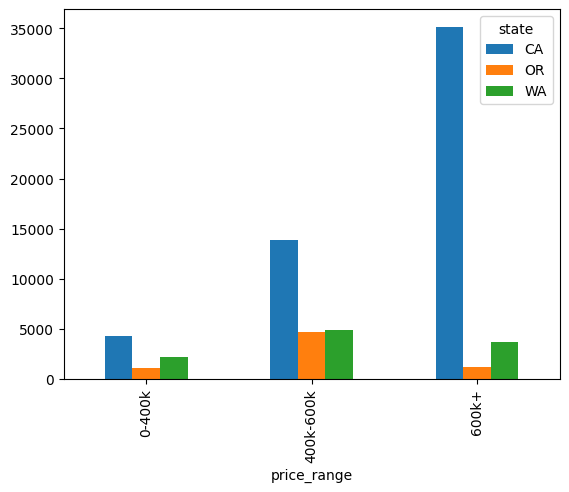

In [63]:
ca_or.plot.bar()

Text(0.5, 0, 'Value')

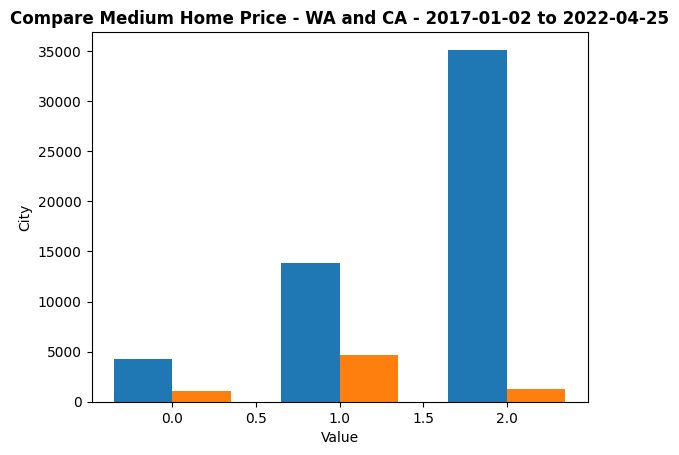

In [62]:
# grupo de barras:
fig, ax = plt.subplots()

width = .35
x = np.arange(3) # tamanho do index

ax.bar(
    x-width/2, 
    ca_or['CA'],
    label='California',
    width=width
    )

ax.bar(
    x+width/2,  
    ca_or['OR'],
    label='Washington',
    width=width
    )

ax.set_title(
    'Compare Medium Home Price - WA and CA - 2017-01-02 to 2022-04-25',
    weight='bold'
    )

ax.set_ylabel('City')
ax.set_xlabel('Value')

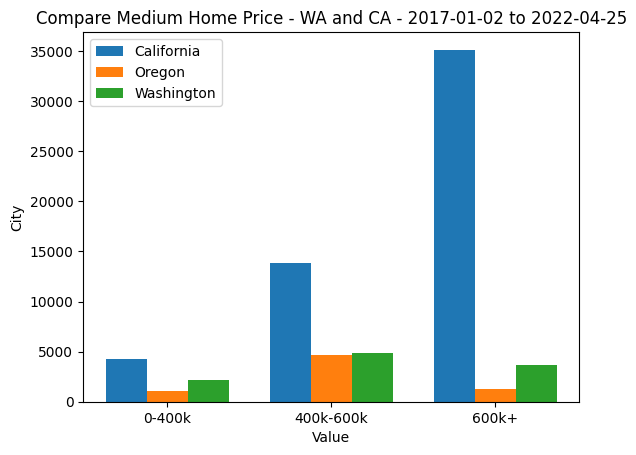

In [77]:
# grupo de barras:
fig, ax = plt.subplots()

width = .25

x1 = np.arange(len(ca_or)) # array([0, 1, 2])
x2 = [x + width for x in x1] # array([0.25, 1.25, 2.25])
x3 = [x + width for x in x2] # array([0.5, 1.5, 2.5])

ax.bar(
    x1, 
    ca_or['CA'],
    label='California',
    width=width
    )

ax.bar(
    x2, 
    ca_or['OR'],
    label='Oregon',
    width=width
    )

ax.bar(
    x3, 
    ca_or['WA'],
    label='Washington',
    width=width
    )

ax.set_title('Compare Medium Home Price - WA and CA - 2017-01-02 to 2022-04-25')

ax.set_ylabel('City')
ax.set_xlabel('Value')

ax.set_xticks(x2)
ax.set_xticklabels(ca_or.index)

ax.legend()

In [82]:
[coluna for coluna in ca_or.index]

['0-400k', '400k-600k', '600k+']

state,CA,OR,WA
price_range,,,
0-400k,4267.0,1074.0,2143.0
400k-600k,13877.0,4711.0,4858.0
600k+,35147.0,1229.0,3649.0


In [103]:
# Coordenadas do eixo X
x = np.arange(len(ca_or.index))  # Número de categorias no eixo X --> array([0, 1, 2])
print(np.arange(len(ca_or.index)))
width = 0.2  # Largura de cada barra

for i, coluna in enumerate(ca_or.columns):
    print(x + i * width)

[0 1 2]
[0. 1. 2.]
[0.2 1.2 2.2]
[0.4 1.4 2.4]


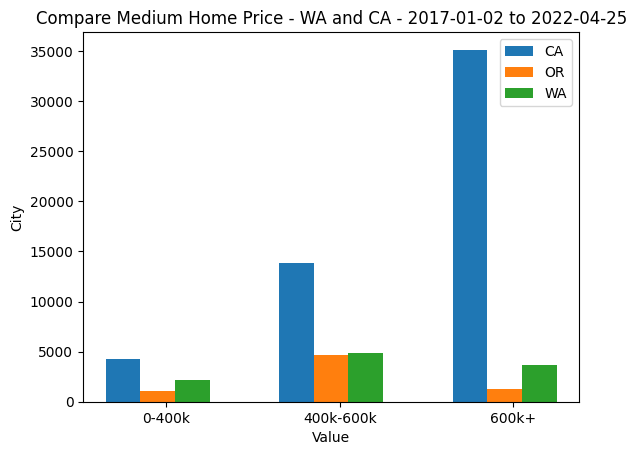

In [ ]:
# grupo de barras:
fig, ax = plt.subplots()

# Coordenadas do eixo X
x = np.arange(len(ca_or.index))  # Número de categorias no eixo X --> array([0, 1, 2])
width = 0.2  # Largura de cada barra

for i, coluna in enumerate(ca_or.columns): 
    ax.bar(
        x + i * width, # [0, 1, 2] / [0.2, 1.2, 2.2] / [0.4, 1.4, 2.4] >> cada iteração será uma array para as barras de cada coluna do DF.
        ca_or[coluna], 
        label=ca_or.columns[i],
        width=width
    )

ax.set_title('Compare Medium Home Price - WA and CA - 2017-01-02 to 2022-04-25')

ax.set_ylabel('City')
ax.set_xlabel('Value')

ax.set_xticks(x2)
ax.set_xticklabels(ca_or.index)

ax.legend()

In [104]:
ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,Sacramento,2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
164,Nevada,2018-09-03,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607
252,Stanislaus,2017-06-05,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632
293,Tehama,2020-01-20,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228
304,Stanislaus,2017-11-13,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362


In [105]:
# loc: seleciona só o que contem CA
# assign: remove o estado + 'county' da str
ca_housing = housing_raw.loc[
    (housing_raw['region_name'].str.contains('CA'))
].assign(region_name = housing_raw['region_name'].str[0:-11]).set_index('period_begin')

In [106]:
ca_housing.head()

,region_name,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
period_begin,,,,,,,,
2020-06-22,Sacramento,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
2018-09-03,Nevada,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607
2017-06-05,Stanislaus,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632
2020-01-20,Tehama,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228
2017-11-13,Stanislaus,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362


In [ ]:
# .loc[ regra , colunas_desejadas ]
sd_dual = (
    ca_housing.loc[ca_housing['region_name'] == 'San Diego', ['inventory','median_active_list_price']]
).sort_index()

sd_dual.head()

,inventory,median_active_list_price
period_begin,,
2017-01-02,5468.0,618570.8
2017-01-09,5493.0,621737.5
2017-01-16,5520.0,625820.8
2017-01-23,5546.0,629491.6
2017-01-30,5581.0,632824.0


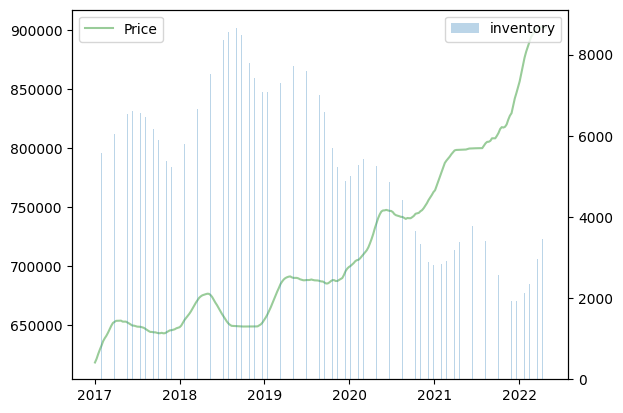

In [115]:
# grupo de barras:
fig, ax = plt.subplots()

ax.plot(
    sd_dual['median_active_list_price'],
    color='green',
    alpha=.4,
    label='Price'
)
ax.legend()

ax2 = ax.twinx()

ax2.bar(
    sd_dual.index,
    sd_dual['inventory'],
    alpha=.3,
    label='inventory'
)

ax2.legend()
ax.legend()

In [121]:
sd_dual_2 = sd_dual.resample('YE').mean()
sd_dual_2

,inventory,median_active_list_price
period_begin,,
2017-12-31,5986.730769,645314.217308
2018-12-31,7438.433962,658434.637736
2019-12-31,6794.538462,685614.486538
2020-12-31,4494.076923,735517.426923
2021-12-31,2975.961538,803811.036538
2022-12-31,2692.470588,889710.241176


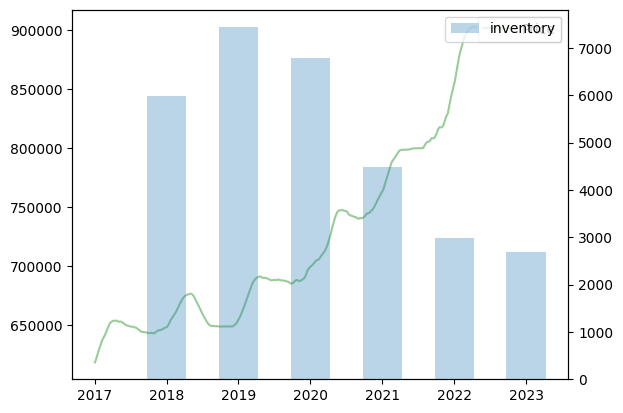

In [ ]:
# grupo de barras:
fig, ax = plt.subplots()

ax.plot(
    sd_dual['median_active_list_price'],
    color='green',
    alpha=.4,
    label='Price'
)
ax.legend()

ax2 = ax.twinx()

ax2.bar(
    sd_dual_2.index,
    sd_dual_2['inventory'],
    alpha=.3,
    label='inventory',
    width=200 # largura de 200 dias.
)

ax2.legend()
ax.legend()